<a href="https://colab.research.google.com/github/ganesh3/opencv-work/blob/main/opencv_basics_pyimagesearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### I have bought the access to pyimageuniversity Plus and hence I am able to access the code below

###Getting and Setting Pixels

Copyright: The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2021 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch Plus at http://pyimg.co/plus/ today.

In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-getting-setting/opencv-getting-setting.zip
!unzip -qq opencv-getting-setting.zip
%cd opencv-getting-setting

--2021-09-29 10:59:53--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-getting-setting/opencv-getting-setting.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.148.138
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.148.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 336672 (329K) [application/zip]
Saving to: ‘opencv-getting-setting.zip’

opencv-getting-sett 100%[===================>] 328.78K   614KB/s    in 0.5s    

2021-09-29 10:59:54 (614 KB/s) - ‘opencv-getting-setting.zip’ saved [336672/336672]

/content/opencv-getting-setting/opencv-getting-setting


In [1]:
from matplotlib import pyplot as plt
import argparse
import cv2
import numpy as np
import imutils

In [2]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, default="adrian.png",
#	help="path to the input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument parsing code with *hard coded* arguments and values
args = {
	"image": "adrian.png"
}

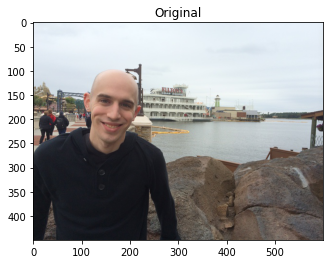

In [ ]:
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
plt_imshow("Original", image)

In [ ]:
# images are simply NumPy arrays -- with the origin (0, 0) located at the top-left of the image
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 233, Green: 240, Blue: 246


In [ ]:
# access the pixel located at x=50, y=20
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (50, 20) - Red: 229, Green: 238, Blue: 245


In [ ]:
# update the pixel at (50, 20) and set it to red
image[20, 50] = (0, 0, 255)
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (50, 20) - Red: 255, Green: 0, Blue: 0


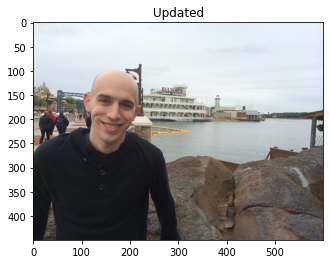

In [ ]:
plt_imshow("Updated", image)

In [ ]:
# compute the center of the image, which is simply the width and height
# divided by two
(cX, cY) = (w // 2, h // 2)

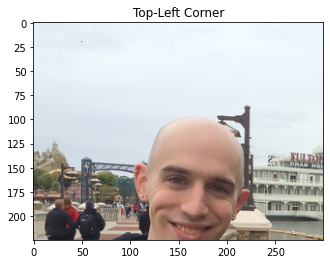

In [ ]:
# since we are using NumPy arrays, we can apply array slicing to grab large chunks/regions of interest from the image -- here we grab the 
#top-left corner of the image
tl = image[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)

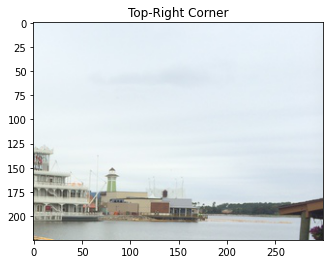

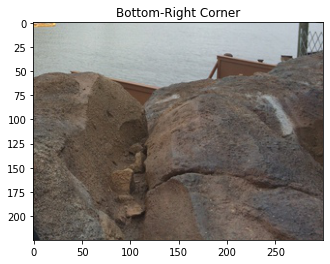

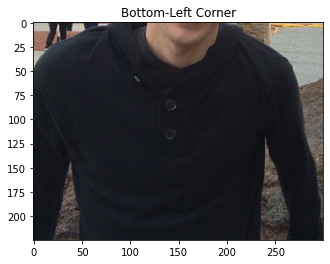

In [ ]:
# in a similar fashion, we can crop the top-right, bottom-right, and
# bottom-left corners of the image and then display them to our
# screen
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)

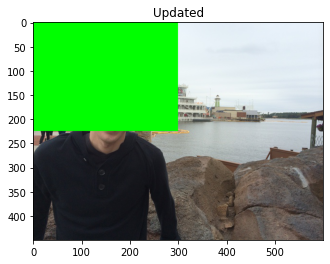

In [ ]:
# set the top-left corner of the original image to be green
image[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt_imshow("Updated", image)

###Drawing with OpenCV

In [ ]:
%cd ..
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-drawing/opencv-drawing.zip
!unzip -qq opencv-drawing.zip
%cd opencv-drawing

--2021-09-29 11:52:21--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-drawing/opencv-drawing.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.177.97
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.177.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 337273 (329K) [application/zip]
Saving to: ‘opencv-drawing.zip’

opencv-drawing.zip  100%[===================>] 329.37K   494KB/s    in 0.7s    

2021-09-29 11:52:22 (494 KB/s) - ‘opencv-drawing.zip’ saved [337273/337273]

/content/opencv-getting-setting/opencv-getting-setting/opencv-drawing


In [ ]:
# initialize our canvas as a 300x300 pixel image with 3 channels (Red, Green, and Blue) with a black background
canvas = np.zeros((300, 300, 3), dtype="uint8")

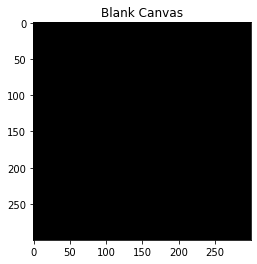

In [ ]:
plt_imshow("Blank Canvas", canvas)

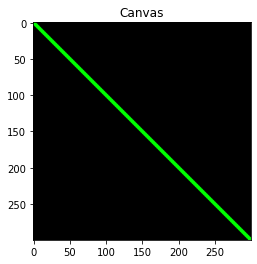

In [ ]:
# draw a green line from the top-left corner of our canvas to the
# bottom-right
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green, 4)
plt_imshow("Canvas", canvas)

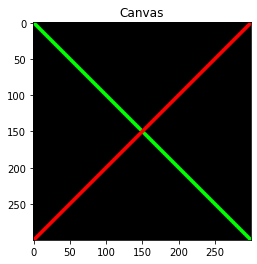

In [ ]:
# draw a 3 pixel thick red line from the top-right corner to the bottom-left
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
plt_imshow("Canvas", canvas)

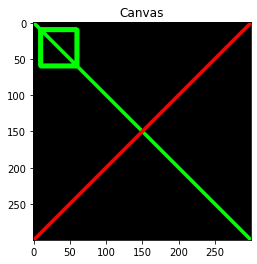

In [ ]:
# draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green, 5)
plt_imshow("Canvas", canvas)

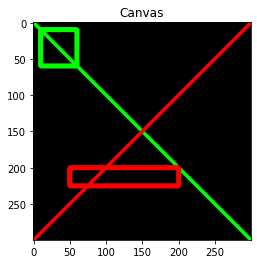

In [ ]:
# draw another rectangle, this one red with 5 pixel thickness
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt_imshow("Canvas", canvas)

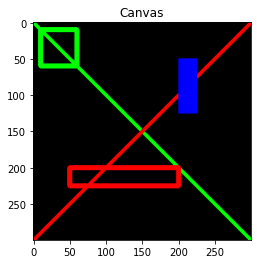

In [ ]:
# draw a final rectangle (blue and filled in )
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt_imshow("Canvas", canvas)

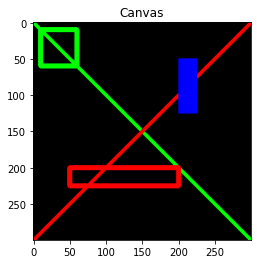

In [ ]:
# draw a final rectangle (blue and filled in )
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt_imshow("Canvas", canvas)

In [ ]:
# re-initialize our canvas as an empty array, then compute the center (x, y)-coordinates of the canvas
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

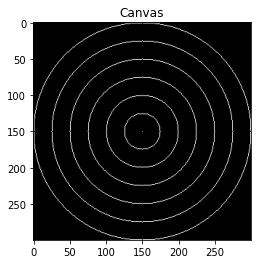

In [ ]:
# loop over increasing radii, from 25 pixels to 150 pixels in 25 pixel increments
for r in range(0, 175, 25):
	# draw a white circle with the current radius size
	cv2.circle(canvas, (centerX, centerY), r, white)

# show our work of art
plt_imshow("Canvas", canvas)

In [ ]:
# re-initialize our canvas once again
canvas = np.zeros((300, 300, 3), dtype="uint8")

In [ ]:
# let's draw 25 random circles
for i in range(0, 25):
	# randomly generate a radius size between 5 and 200, generate a random color, and then pick a random point on our canvas 
  # where the circle will be drawn
	radius = np.random.randint(5, high=200)
	color = np.random.randint(0, high=256, size=(3,)).tolist()
	pt = np.random.randint(0, high=300, size=(2,))

	# draw our random circle on the canvas
	cv2.circle(canvas, tuple(pt), radius, color, -1)

In [ ]:
print(color), print(pt)

[118, 158, 109]
[57 44]


(None, None)

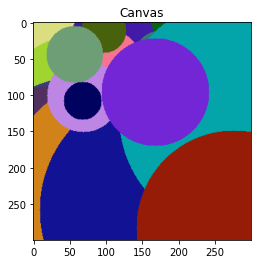

In [ ]:
# display our masterpiece to our screen
plt_imshow("Canvas", canvas)

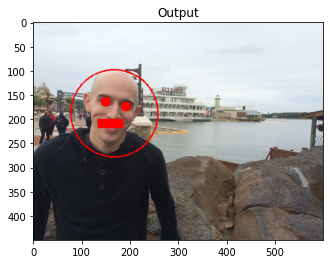

In [ ]:
# load the input image from disk
image = cv2.imread(args["image"])

# draw a circle around my face, two filled in circles covering my
# eyes, and a rectangle over top of my mouth
cv2.circle(image, (168, 188), 90, (0, 0, 255), 2)
cv2.circle(image, (150, 164), 10, (0, 0, 255), -1)
cv2.circle(image, (192, 174), 10, (0, 0, 255), -1)
cv2.rectangle(image, (134, 200), (186, 218), (0, 0, 255), -1)

# show the output image
plt_imshow("Output", image)

###Translation

In [ ]:
%cd ..

/content/opencv-getting-setting/opencv-getting-setting
/content/opencv-getting-setting


In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-translate/opencv-translate.zip
!unzip -qq opencv-translate.zip
%cd opencv-translate

--2021-09-29 14:37:38--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-translate/opencv-translate.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.177.57
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.177.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34437 (34K) [application/zip]
Saving to: ‘opencv-translate.zip’

opencv-translate.zi 100%[===================>]  33.63K  --.-KB/s    in 0.08s   

2021-09-29 14:37:39 (401 KB/s) - ‘opencv-translate.zip’ saved [34437/34437]

/content/opencv-translate


In [ ]:
args = {
	"image": "opencv_logo.png"
}

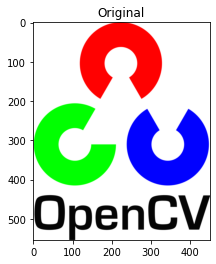

In [ ]:
# load the image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

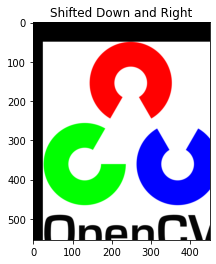

In [ ]:
# shift the image 25 pixels to the right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Down and Right", shifted)

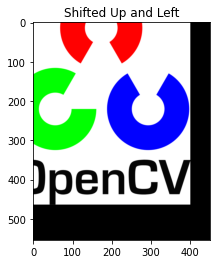

In [ ]:
# now, let's shift the image 50 pixels to the left and 90 pixels up by specifying negative values for the x and y directions,
# respectively
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Up and Left", shifted)

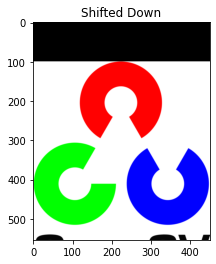

In [ ]:
# use the imutils helper function to translate the image 100 pixels down in a single function call
shifted = imutils.translate(image, 0, 100)
plt_imshow("Shifted Down", shifted)

###Rotation

In [ ]:
%cd ..

/content


In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-rotate/opencv-rotate.zip
!unzip -qq opencv-rotate.zip
%cd opencv-rotate

--2021-09-29 14:47:11--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-rotate/opencv-rotate.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.160.74
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.160.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61723 (60K) [binary/octet-stream]
Saving to: ‘opencv-rotate.zip’

opencv-rotate.zip   100%[===================>]  60.28K   367KB/s    in 0.2s    

2021-09-29 14:47:11 (367 KB/s) - ‘opencv-rotate.zip’ saved [61723/61723]

/content/opencv-rotate


In [ ]:
args = {
    "image1": "images/saratoga.jpg"
}

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!pwd

/content/opencv-rotate


In [ ]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

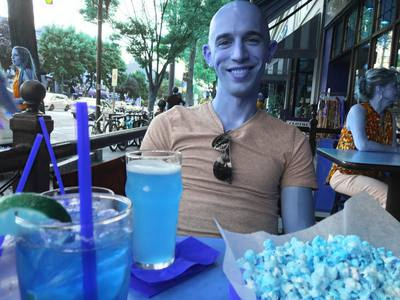

In [ ]:
# load the image and show it
image = cv2.imread(args["image1"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image)

In [ ]:
# grab the dimensions of the image and calculate the center of the image
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)
image.shape, (cX, cY)

((300, 400, 3), (200, 150))

In [ ]:
# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)

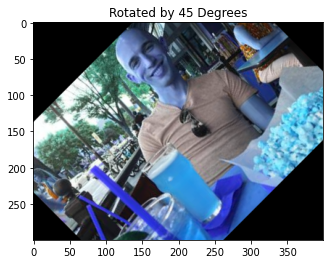

In [ ]:
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by 45 Degrees", rotated)

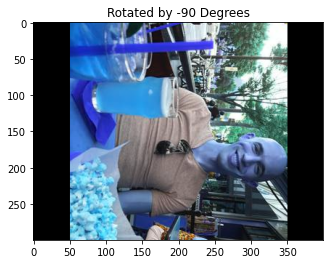

In [ ]:
# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by -90 Degrees", rotated)

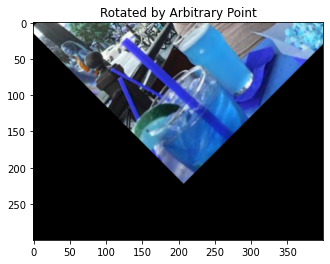

In [ ]:
# rotate our image around an arbitrary point rather than the center
M = cv2.getRotationMatrix2D((10, 10), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by Arbitrary Point", rotated)

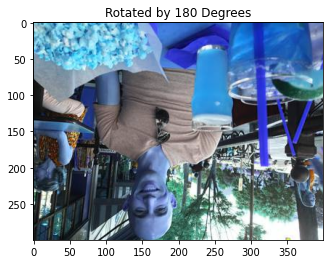

In [ ]:
# use our imutils function to rotate an image 180 degrees
rotated = imutils.rotate(image, 180)
plt_imshow("Rotated by 180 Degrees", rotated)

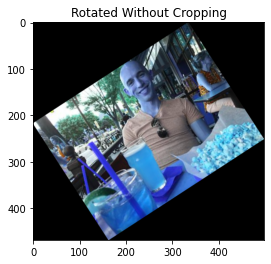

In [ ]:
# rotate our image by 33 degrees counterclockwise, ensuring the entire rotated image still views in the viewing area
rotated = imutils.rotate_bound(image, -33)
plt_imshow("Rotated Without Cropping", rotated)

###Resizing

In [ ]:
%cd ..
!pwd

In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-resizing/opencv-resizing.zip
!unzip -qq opencv-resizing.zip
%cd opencv-resizing

--2021-09-30 15:48:02--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-resizing/opencv-resizing.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.233.17
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.233.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82969 (81K) [application/zip]
Saving to: ‘opencv-resizing.zip’

opencv-resizing.zip 100%[===================>]  81.02K   485KB/s    in 0.2s    

2021-09-30 15:48:03 (485 KB/s) - ‘opencv-resizing.zip’ saved [82969/82969]

/content/opencv-resizing


In [ ]:
args = {
    "image": "adrian.png"
}

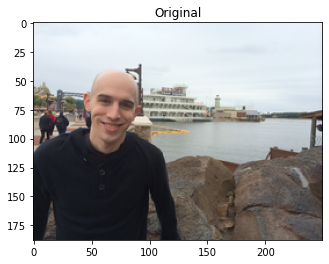

In [ ]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

In [ ]:
# let's resize our image to be 150 pixels wide, but in order to # prevent our resized image from being skewed/distorted, 
# we mustfirst calculate the ratio of the *new* width to the *old* width
(h, w) = image.shape[:2]
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))
r, dim, h, w

(0.6, (150, 112), 188, 250)

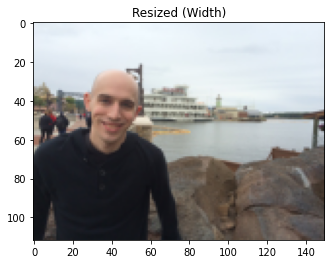

In [ ]:
# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)

In [ ]:
# let's resize the image to have a width of 50 pixels, again keeping in mind the aspect ratio
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

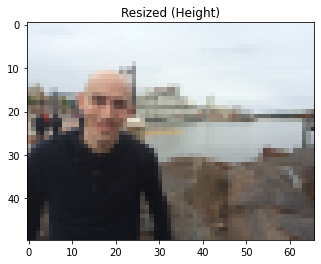

In [ ]:
# perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

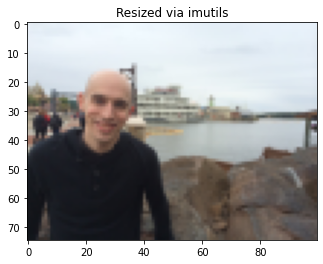

In [ ]:
# calculating the ratio each and every time we want to resize an # image is a real pain, so let's use the imutils convenience
# function which will *automatically* maintain our aspect ratio for us
resized = imutils.resize(image, width=100)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


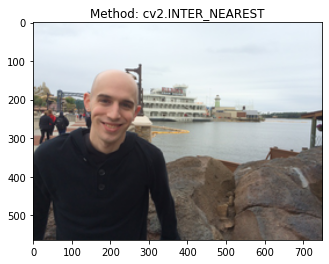

[INFO] cv2.INTER_LINEAR


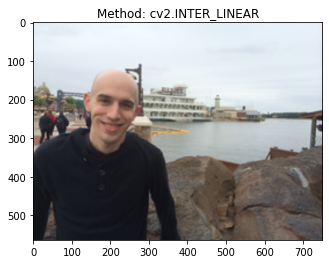

[INFO] cv2.INTER_AREA


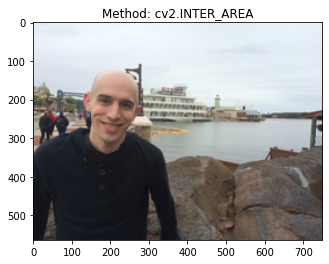

[INFO] cv2.INTER_CUBIC


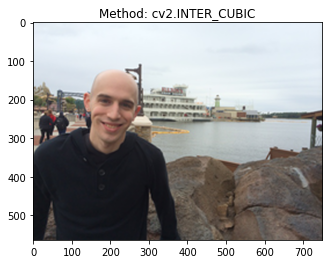

[INFO] cv2.INTER_LANCZOS4


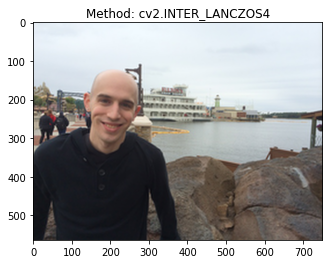

In [ ]:
#Use the CUBIC or LANCZOS4 method when you resize an image from smaller to larger and Use LINEAR for resing large image to
#smaller image
# construct the list of interpolation methods in OpenCV
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image, width=image.shape[1] * 3, inter=method)
	plt_imshow("Method: {}".format(name), resized)

###Flipping

In [ ]:
%cd ..

In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-flipping/opencv-flipping.zip
!unzip -qq opencv-flipping.zip
%cd opencv-flipping

--2021-10-01 12:29:26--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-flipping/opencv-flipping.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.233.9
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.233.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36582 (36K) [application/zip]
Saving to: ‘opencv-flipping.zip’

opencv-flipping.zip 100%[===================>]  35.72K  --.-KB/s    in 0.08s   

2021-10-01 12:29:27 (443 KB/s) - ‘opencv-flipping.zip’ saved [36582/36582]

/content/opencv-flipping


In [ ]:
args = {
	"image": "opencv_logo.png"
}

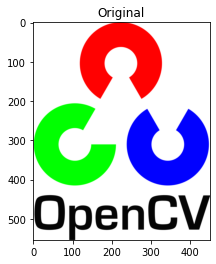

In [ ]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

[INFO] flipping image horizontally...


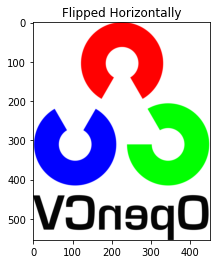

In [ ]:
# flip the image horizontally
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image, 1)
plt_imshow("Flipped Horizontally", flipped)

[INFO] flipping image vertically...


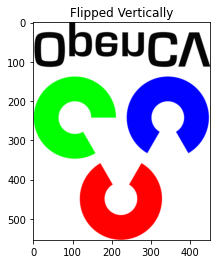

In [ ]:
# flip the image vertically
flipped = cv2.flip(image, 0)
print("[INFO] flipping image vertically...")
plt_imshow("Flipped Vertically", flipped)

[INFO] flipping image horizontally and vertically...


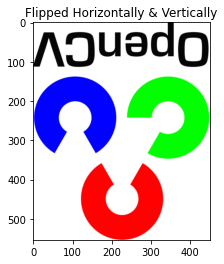

In [ ]:
# flip the image along both axes
flipped = cv2.flip(image, -1)
print("[INFO] flipping image horizontally and vertically...")
plt_imshow("Flipped Horizontally & Vertically", flipped)

###Cropping

In [ ]:
%cd ..

/root


In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-cropping/opencv-cropping.zip
!unzip -qq opencv-cropping.zip
%cd opencv-cropping

--2021-10-01 12:32:03--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-cropping/opencv-cropping.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.236.105
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.236.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 336317 (328K) [application/zip]
Saving to: ‘opencv-cropping.zip’

opencv-cropping.zip 100%[===================>] 328.43K   982KB/s    in 0.3s    

2021-10-01 12:32:04 (982 KB/s) - ‘opencv-cropping.zip’ saved [336317/336317]

/root/opencv-cropping


In [ ]:
I = np.arange(0, 25)
I

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
I = I.reshape((5, 5))
I

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
I[0:3, 0:2]

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

In [ ]:
I[3:5, 1:5]

array([[16, 17, 18, 19],
       [21, 22, 23, 24]])

In [ ]:
args = {
	"image": "adrian.png"
}

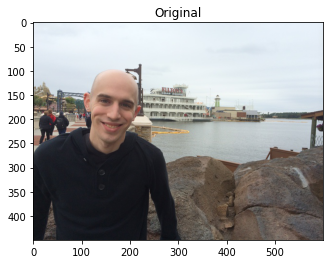

In [ ]:
# load the input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

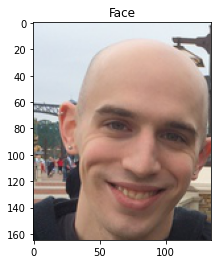

In [ ]:
# cropping an image with OpenCV is accomplished via simple NumPy array slices in startY:endY, startX:endX order -- 
# here we are cropping the face from the image (these coordinates were determined using photo editing software 
# such as Photoshop, GIMP, Paint, etc.)
face = image[85:250, 85:220]
plt_imshow("Face", face)

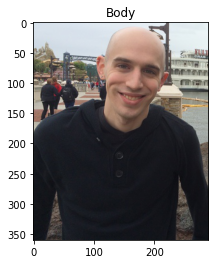

In [ ]:
# apply another image crop, this time extracting the body
body = image[90:450, 0:290]
plt_imshow("Body", body)

###Image Arithematic

In [ ]:
%cd ..

In [3]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-image-arithmetic/opencv-image-arithmetic.zip
!unzip -qq opencv-image-arithmetic.zip
%cd opencv-image-arithmetic

--2021-10-09 16:03:32--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-image-arithmetic/opencv-image-arithmetic.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.130.42
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.130.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534763 (522K) [application/zip]
Saving to: ‘opencv-image-arithmetic.zip’

opencv-image-arithm 100%[===================>] 522.23K  1.25MB/s    in 0.4s    

2021-10-09 16:03:33 (1.25 MB/s) - ‘opencv-image-arithmetic.zip’ saved [534763/534763]

/content/opencv-image-arithmetic


In [4]:
args = {
	"image": "grand_canyon.png"
}

In [5]:
# images are NumPy arrays stored as unsigned 8-bit integers (unit8) with values in the range [0, 255]; when using the add/subtract
# functions in OpenCV, these values will be *clipped* to this range, even if they fall outside the range [0, 255] after applying the operation
added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [14]:
# using NumPy arithmetic operations (rather than OpenCV operations) will result in a modulo ("wrap around") instead of being clipped
# to the range [0, 255] 
added = np.uint8([200]) + np.uint8([100])
subtracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [206]


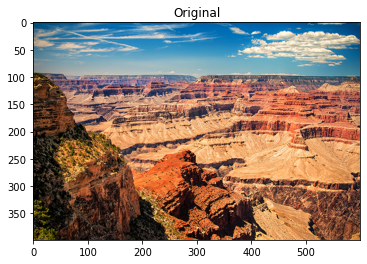

In [18]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

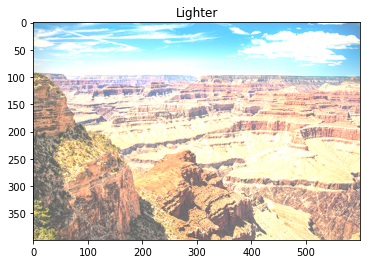

In [19]:
# increasing the pixel intensities in our input image by 100 is accomplished by constructing a NumPy array that has the *same
# dimensions* as our input image, filling it with ones, multiplying it by 100, and then adding the input image and matrix together

M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

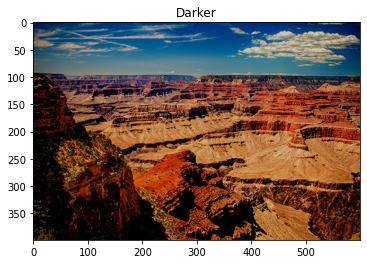

In [20]:
# similarly, we can subtract 50 from all pixels in our image and make it darker
M = np.ones(image.shape, dtype="uint8") * 50
subtract = cv2.subtract(image, M)
plt_imshow("Darker", subtract)

###Bitwise Operations

In [21]:
%cd ..

/root


In [23]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-bitwise/opencv-bitwise.zip
!unzip -qq opencv-bitwise.zip
%cd opencv-bitwise.zip

--2021-10-09 16:22:05--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-bitwise/opencv-bitwise.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.229.225
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.229.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1903 (1.9K) [application/zip]
Saving to: ‘opencv-bitwise.zip’

opencv-bitwise.zip  100%[===================>]   1.86K  --.-KB/s    in 0s      

2021-10-09 16:22:05 (91.0 MB/s) - ‘opencv-bitwise.zip’ saved [1903/1903]

[Errno 20] Not a directory: 'opencv-bitwise.zip'
/root


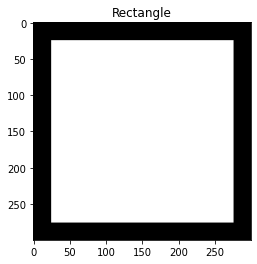

In [26]:
#draw a rectangle
rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25,25), (275, 275), 255, -1)
plt_imshow("Rectangle", rectangle)

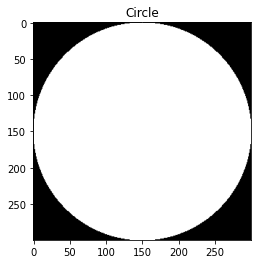

In [28]:
#draw a circle
circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(circle, (150,150), 150, 255, -1)
plt_imshow("Circle", circle)

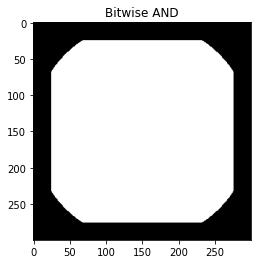

In [29]:
# a bitwise 'AND' is only 'True' when both inputs have a value that is "ON' -- in this case, the cv2.bitwise_and 
# function examines every pixel in the rectangle and circle; if *BOTH* pixels have a value greater than zero then 
# the pixel is turned 'ON (i.e., 255) in the output image; otherwise, the output value is set to 'OFF' (i.e., 0)
bitwise_and = cv2.bitwise_and(rectangle, circle)
plt_imshow("Bitwise AND", bitwise_and)

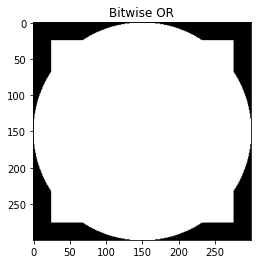

In [30]:
# a bitwise 'OR' examines every pixel in the two inputs, and if *EITHER* pixel in the rectangle or circle is 
# greater than zero, then the output pixel has a value of 255, otherwise it is 0
bitwise_or = cv2.bitwise_or(circle, rectangle)
plt_imshow("Bitwise OR", bitwise_or)

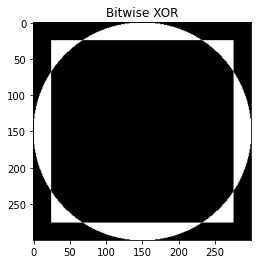

In [31]:
# the bitwise 'XOR' is identical to the 'OR' function, with one exception: both the rectangle and 
#circle are not allowed to *BOTH* have values greater than 0 (only one can be 0)
bitwise_xor = cv2.bitwise_xor(circle, rectangle)
plt_imshow("Bitwise XOR", bitwise_xor)

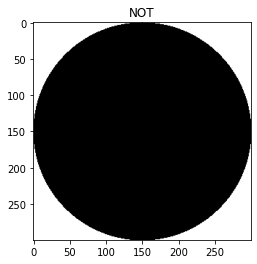

In [32]:
# finally, the bitwise 'NOT' inverts the values of the pixels; pixels with a value of 255 become 0, 
# and pixels with a value of 0 become 255
bitwise_not = cv2.bitwise_not(circle)
plt_imshow("NOT", bitwise_not)

###Masking

In [33]:
%cd ..

/


In [34]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-masking/opencv-masking.zip
!unzip -qq opencv-masking.zip
%cd opencv-masking

--2021-10-09 17:01:10--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-masking/opencv-masking.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.145.146
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.145.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338523 (331K) [application/zip]
Saving to: ‘opencv-masking.zip’

opencv-masking.zip  100%[===================>] 330.59K  1002KB/s    in 0.3s    

2021-10-09 17:01:11 (1002 KB/s) - ‘opencv-masking.zip’ saved [338523/338523]

/opencv-masking


In [35]:
args = {
	"image": "adrian.png"
}

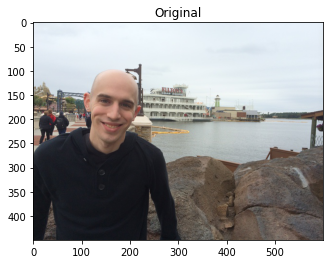

In [36]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

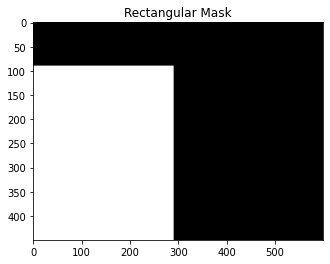

In [37]:
# a mask is the same size as our image, but has only two pixel values, 0 and 255 -- pixels with a value of 0 (background) 
# are ignored in the original image while mask pixels with a value of 255 (foreground) are allowed to be kept
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt_imshow("Rectangular Mask", mask)

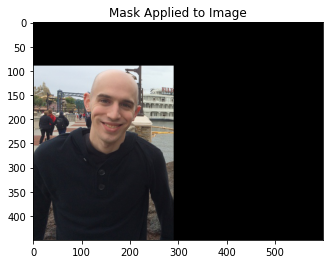

In [38]:
# apply our mask -- notice how only the person in the image is cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

In [39]:
# now, let's make a circular mask with a radius of 100 pixels and apply the mask again
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

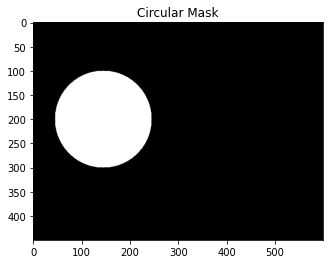

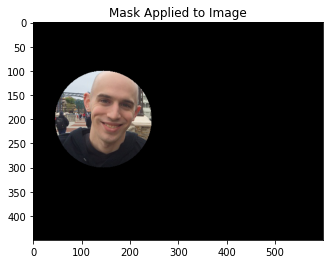

In [40]:
# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)

###Splitting and Merging Channels

In [41]:
%cd ..

/


In [42]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-split-merge/opencv-split-merge.zip
!unzip -qq opencv-split-merge.zip
%cd opencv-split-merge

--2021-10-09 17:05:43--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-split-merge/opencv-split-merge.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.250.9
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.250.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117380 (115K) [application/zip]
Saving to: ‘opencv-split-merge.zip’

opencv-split-merge. 100%[===================>] 114.63K   452KB/s    in 0.3s    

2021-10-09 17:05:43 (452 KB/s) - ‘opencv-split-merge.zip’ saved [117380/117380]

/opencv-split-merge


In [43]:
args = {
	"image": "opencv_logo.png"
}

In [44]:
# load the input image and grab each channel -- note how OpenCV represents images as NumPy arrays with 
# channels in Blue, Green, Red ordering rather than Red, Green Blue
image = cv2.imread(args["image"])
(B, G, R) = cv2.split(image)

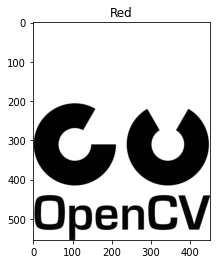

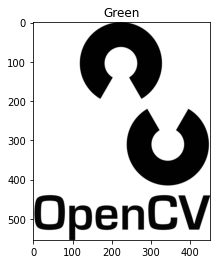

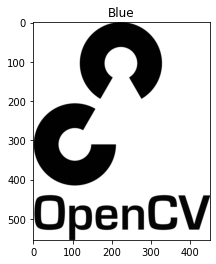

In [45]:
# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

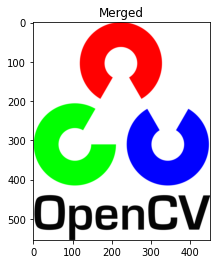

In [46]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

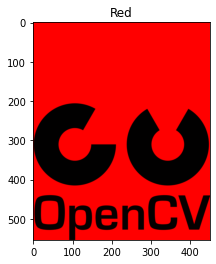

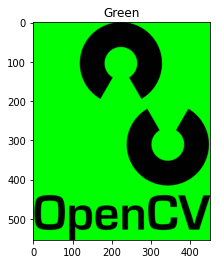

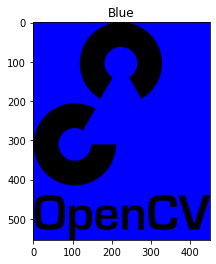

In [47]:
# visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))